In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nutrition-facts/menu.csv


In [2]:
import pandas as pd

df = pd.read_csv("/kaggle/input/nutrition-facts/menu.csv")  
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [3]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [5]:
df.isnull().sum()
df.duplicated().sum()

0

In [6]:
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [7]:
print(df.columns)


Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')


In [8]:
desc_stats = df.describe().T[['mean', '50%', 'std', 'min', 'max']]
print(desc_stats)

                                     mean    50%         std  min     max
Calories                       368.269231  340.0  240.269886  0.0  1880.0
Calories from Fat              127.096154  100.0  127.875914  0.0  1060.0
Total Fat                       14.165385   11.0   14.205998  0.0   118.0
Total Fat (% Daily Value)       21.815385   17.0   21.885199  0.0   182.0
Saturated Fat                    6.007692    5.0    5.321873  0.0    20.0
Saturated Fat (% Daily Value)   29.965385   24.0   26.639209  0.0   102.0
Trans Fat                        0.203846    0.0    0.429133  0.0     2.5
Cholesterol                     54.942308   35.0   87.269257  0.0   575.0
Cholesterol (% Daily Value)     18.392308   11.0   29.091653  0.0   192.0
Sodium                         495.750000  190.0  577.026323  0.0  3600.0
Sodium (% Daily Value)          20.676923    8.0   24.034954  0.0   150.0
Carbohydrates                   47.346154   44.0   28.252232  0.0   141.0
Carbohydrates (% Daily Value)   15.780

In [9]:
category_stats = df.groupby('Category')[['Calories','Protein','Total Fat','Sodium']].mean().sort_values('Calories', ascending=False)
print(category_stats)

                      Calories    Protein  Total Fat       Sodium
Category                                                         
Chicken & Fish      552.962963  29.111111  26.962963  1257.777778
Smoothies & Shakes  531.428571  10.857143  14.125000   183.571429
Breakfast           526.666667  19.857143  27.690476  1211.071429
Beef & Pork         494.000000  27.333333  24.866667  1020.666667
Coffee & Tea        283.894737   8.863158   8.021053   136.894737
Salads              270.000000  19.833333  11.750000   588.333333
Snacks & Sides      245.769231   8.384615  10.538462   395.769231
Desserts            222.142857   4.000000   7.357143   117.142857
Beverages           113.703704   1.333333   0.092593    41.481481


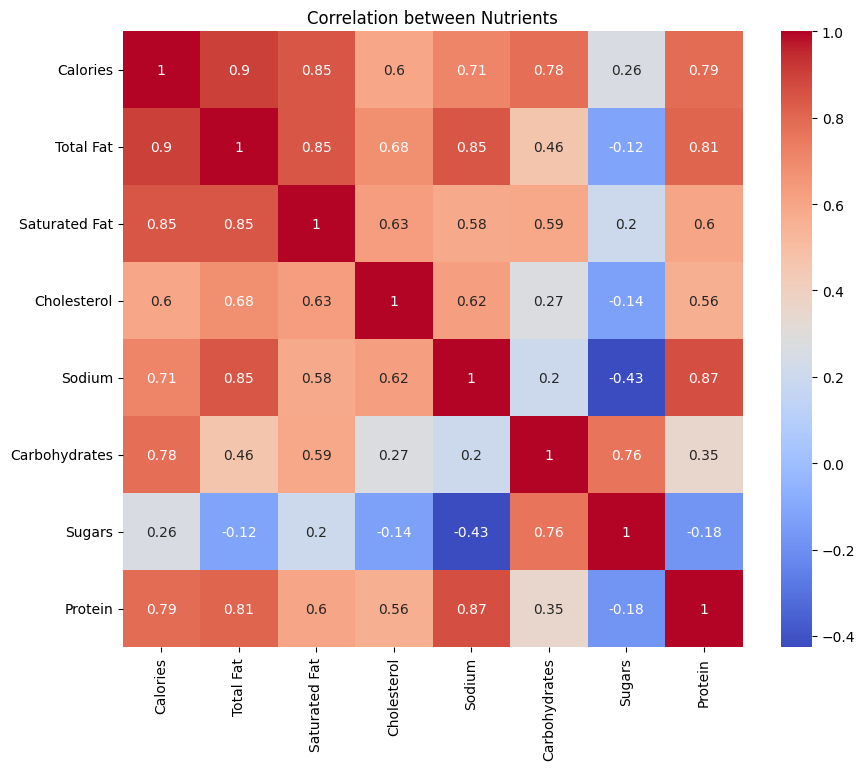

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[['Calories','Total Fat','Saturated Fat','Cholesterol','Sodium','Carbohydrates','Sugars','Protein']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation between Nutrients")
plt.show()

In [11]:
print(df.dtypes)

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object


In [12]:
numeric_cols = ['Calories','Total Fat','Saturated Fat','Trans Fat','Cholesterol',
                'Sodium','Carbohydrates','Dietary Fiber','Sugars','Protein']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [13]:
# Top 10 highest calorie items
top_calories = df[['Item','Calories']].sort_values(by='Calories', ascending=False).head(10)
print("\n🔥 Top 10 Highest Calorie Items:\n", top_calories)

# Top 10 lowest calorie items
low_calories = df[['Item','Calories']].sort_values(by='Calories', ascending=True).head(10)
print("\n🥗 Top 10 Lowest Calorie Items:\n", low_calories)

# Protein per Calorie ratio
df['protein_per_calorie'] = df['Protein'] / df['Calories']
best_protein_ratio = df[['Item','protein_per_calorie']].sort_values(by='protein_per_calorie', ascending=False).head(10)
print("\n💪 Top 10 Items with Best Protein-to-Calorie Ratio:\n", best_protein_ratio)



🔥 Top 10 Highest Calorie Items:
                                                   Item  Calories
82                        Chicken McNuggets (40 piece)      1880
32         Big Breakfast with Hotcakes (Large Biscuit)      1150
31       Big Breakfast with Hotcakes (Regular Biscuit)      1090
34   Big Breakfast with Hotcakes and Egg Whites (La...      1050
33   Big Breakfast with Hotcakes and Egg Whites (Re...       990
81                        Chicken McNuggets (20 piece)       940
253               McFlurry with M&M’s Candies (Medium)       930
249                            Chocolate Shake (Large)       850
246                           Strawberry Shake (Large)       850
251                             Shamrock Shake (Large)       820

🥗 Top 10 Lowest Calorie Items:
                         Item  Calories
125   Diet Dr Pepper (Child)         0
138        Iced Tea (Medium)         0
137         Iced Tea (Small)         0
136      Dasani Water Bottle         0
145           Coffee (S

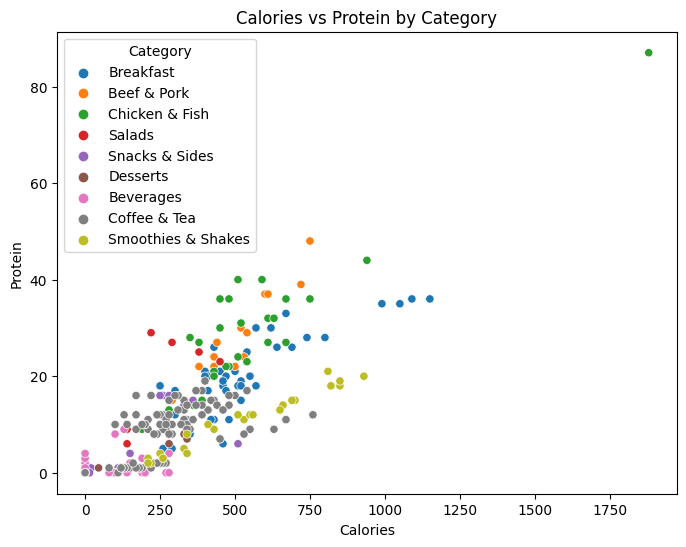

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Calories", y="Protein", hue="Category")
plt.title("Calories vs Protein by Category")
plt.show()

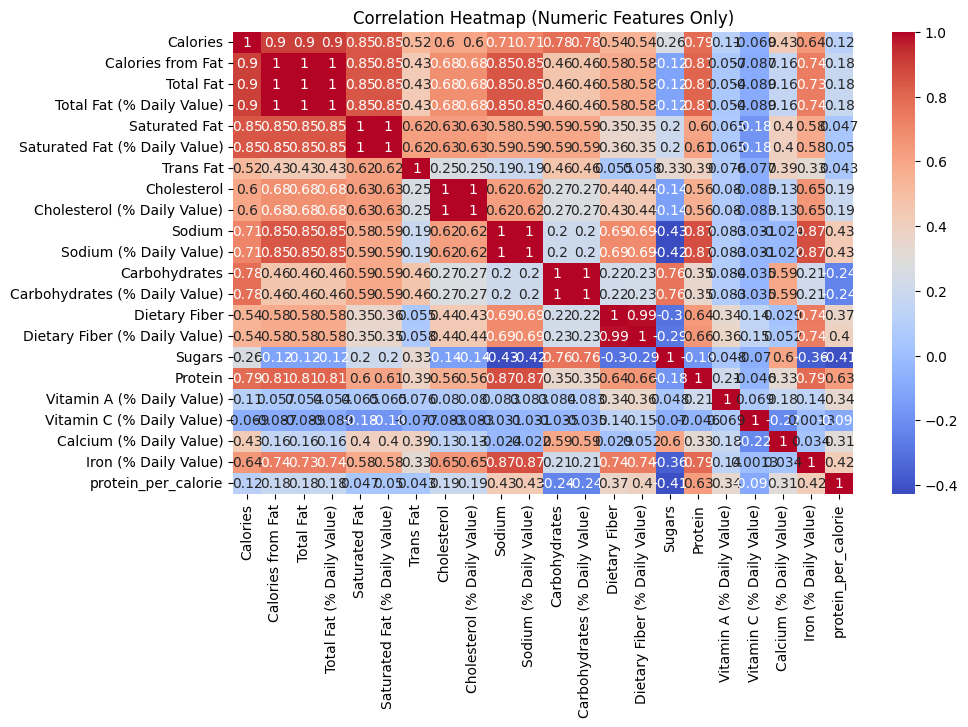

In [15]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()